In [1]:
!pip install wfdb matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.2 MB/s eta 0:00:00


In [15]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 12.6 MB/s eta 0:00:0000:01


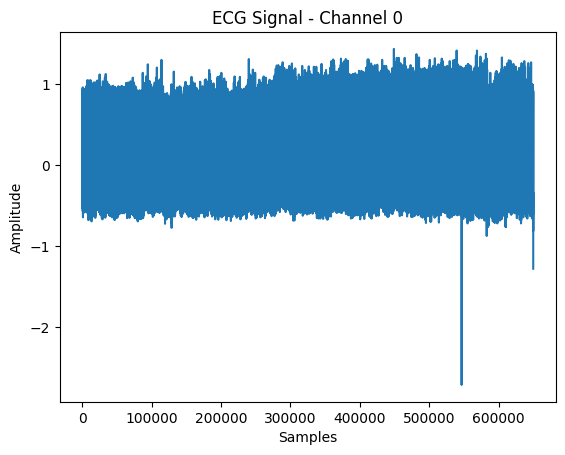

In [2]:
import wfdb
import matplotlib.pyplot as plt

record = wfdb.rdrecord('100', pn_dir='mitdb')

plt.plot(record.p_signal[:,0])
plt.title('ECG Signal - Channel 0')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


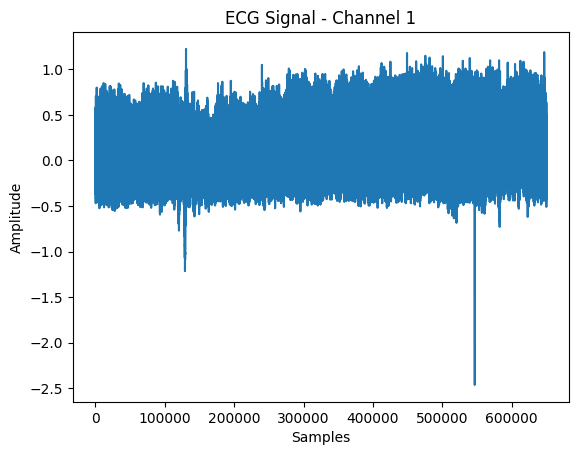

In [3]:
plt.plot(record.p_signal[:,1])
plt.title('ECG Signal - Channel 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


In [6]:
print(record.__dict__)
print("Number of channels:", record.n_sig)
print("Signal names:", record.sig_name)
print("Sampling frequency:", record.fs)


{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [-22131, 20052], 'block_size': [0, 0]}
Number of channels: 2
Signal names: ['MLII', 'V5']
Sampling frequency: 360


In [5]:
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')
print(annotation.__dict__)
print(annotation.sample[:10])  # أول 10 نقاط علامات
print(annotation.symbol[:10])  # الرموز اللي بتوضح نوع النبضة


{'record_name': '100', 'extension': 'atr', 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

Sample data:
    MLII     V5
0 -0.145 -0.065
1 -0.145 -0.065
2 -0.145 -0.065
3 -0.145 -0.065
4 -0.145 -0.065

Signal names:
['MLII', 'V5']


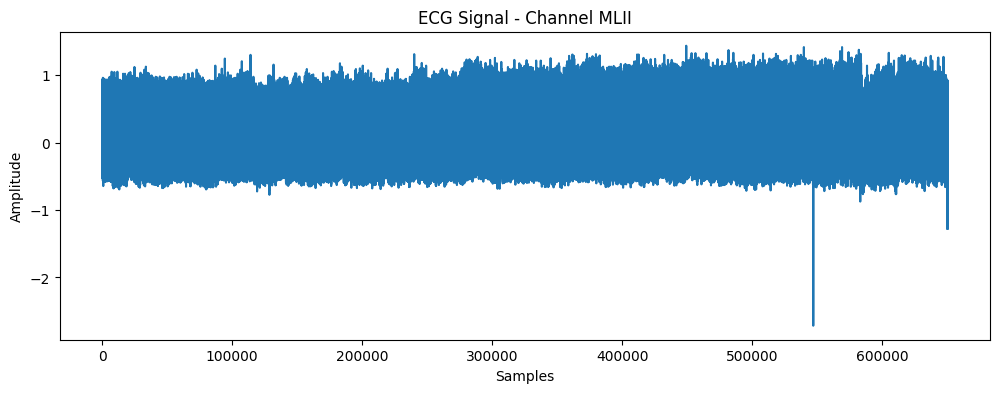

In [7]:
import wfdb
import matplotlib.pyplot as plt
import pandas as pd

record = wfdb.rdrecord('100', pn_dir='mitdb')

df = pd.DataFrame(record.p_signal, columns=record.sig_name)

print("Sample data:")
print(df.head())

print("\nSignal names:")
print(record.sig_name)

channel_name = record.sig_name[0]  
plt.figure(figsize=(12,4))
plt.plot(df[channel_name])
plt.title(f'ECG Signal - Channel {channel_name}')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


In [13]:
import plotly.graph_objs as go
import pandas as pd

df = pd.DataFrame(df)  

fig = go.Figure()
fig.add_trace(go.Scatter(y=df['MLII'], mode='lines', name='MLII'))
fig.add_trace(go.Scatter(y=df['V5'], mode='lines', name='V5'))

fig.update_layout(
    title='ECG Signals',
    xaxis_title='Sample Number',
    yaxis_title='Amplitude'
)

fig.show()


مواقع ضربات القلب: [   370    662    946 ... 649231 649484 649733]


/usr/local/lib/python3.11/dist-packages/neurokit2/ecg/ecg_plot.py:70: NeuroKitWarning:

'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.



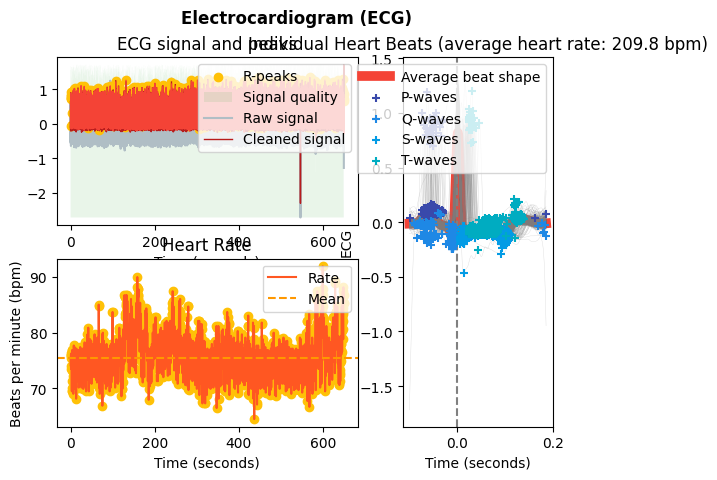

In [18]:
import neurokit2 as nk

ecg_signal = df['MLII'].values

signals, info = nk.ecg_process(ecg_signal, sampling_rate=360) 


rpeaks = info['ECG_R_Peaks']

print(f"مواقع ضربات القلب: {rpeaks}")

# ممكن نعرض الإشارة مع ال R-peaks
nk.ecg_plot(signals)
